## **Predicción del Riesgo de Insatisfacción del Cliente (CSAT) en un Contact Center**


##### Proyecto Final - Bootcamp de Data Science
##### Autor Viviana Andrea Gonzalez
##### Fecha: Febrero 2026

## **1. Contexto del Problema**

Los contact centers manejan diariamente un alto volumen de interacciones con clientes, donde la calidad del servicio impacta directamente en la satisfacción, la retención y los costos operativos.

Identificar de manera temprana interacciones con alto riesgo de insatisfacción permite a las organizaciones optimizar la asignación de recursos, mejorar la experiencia del cliente y reducir retrabajos.


### **Objetivo del Proyecto**
Desarrollar un modelo analítico que permita identificar el riesgo de insatisfacción del cliente (CSAT bajo) a partir de variables operativas del contact center, y generar insights que apoyen la asignación de casos al nivel de agente más adecuado, con el fin de mejorar la experiencia del cliente y optimizar la gestión operativa.

### **Alcance del Proyecto**

Este proyecto se desarrolla utilizando un un dataset público que representa interacciones de clientes en un entorno de contact center.El análisis incluye:

*   Preparación y limpieza de datos
*   Análisis exploratorio (EDA)
*   Construcción de un modelo predictivo para riesgo de insatisfacción
*   Evaluación del modelo mediante métricas adecuadas
*   Interpretación de resultados desde una perspectiva de negocio


### **Estructura del Notebook**


1.   Contexto y definición del problema
2.   Descripción del dataset
3.   Limpieza y preprocesamiento de datos
4.   Análisis exploratorio de datos (EDA)
5.   Modelado y evaluación
6.   Conclusiones y propuesta estratégica

## **2. Descripción del Dataset**

El dataset utilizado en este proyecto corresponde a un conjunto de datos público disponible en Kaggle, que contiene información sobre interacciones de clientes en un entorno de atención al cliente similar a un contact center.

El conjunto de datos incluye variables relacionadas con el canal de contacto, el tipo de consulta, características del agente y un puntaje de satisfacción del cliente (CSAT), lo que permite analizar factores asociados al riesgo de insatisfacción.

El dataset cuenta con aproximadamente 85907 registros y 20 variables, y representa múltiples tipos de interacciones y perfiles operativos dentro del servicio al cliente.

Variables relevantes utilizadas

Para el desarrollo del proyecto se seleccionaron las siguientes variables, considerando su disponibilidad al inicio o en las primeras etapas de la interacción:

* channel_name: canal de contacto utilizado por el cliente (llamada, chat, email, etc)
* category: categoría general del motivo de contacto.
* sub_category: detalle específico del tipo de consulta.
* agent_shift: turno en el que fue atendido el caso.
* tenure_bucket: nivel de experiencia del agente.
* csat_score: puntaje de satisfacción otorgado por el cliente.

### **Definición de la variable objetivo (CSAT bajo)**

1.  Definición de la Variable Objetivo

El puntaje de satisfacción del cliente (CSAT) es una métrica comúnmente utilizada en contact centers para evaluar la percepción del servicio recibido. Sin embargo, para efectos operativos, resulta más útil identificar casos con alto riesgo de insatisfacción que analizar el valor exacto del puntaje.

Por esta razón, el problema se reformula como una tarea de clasificación binaria, donde se define una nueva variable objetivo denominada CSAT_binary.

2.   Definición de CSAT_binary

La variable CSAT_binary se construyó de la siguiente manera:
* CSAT ≤ 3 → 0 (Alto riesgo de insatisfacción)
* CSAT ≥ 4 → 1 (Bajo riesgo de insatisfacción)

3. Justificación de la transformación

Esta transformación permite enfocar el análisis en la detección temprana de casos problemáticos, alineando el modelo con decisiones operativas reales, como la priorización de casos o la asignación a agentes con mayor experiencia.

De esta manera, el modelo no busca predecir un puntaje exacto, sino anticipar el riesgo de insatisfacción del cliente, lo cual resulta más accionable desde una perspectiva de negocio.



In [ ]:
# ===============================
# LIBRERÍAS DEL PROYECTO CSAT
# ===============================

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluación
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

# Utilidades
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data science/Customer_support_data.csv')

In [ ]:
import pandas as pd
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
df.shape

(85907, 20)

## **3. Limpieza y preprocesamiento de datos**

In [ ]:
# ===============================
# PASO 2: SELECCIÓN DE VARIABLES PRE-INTERACCIÓN
# ===============================

cols_pre_interaction = [
    'channel_name',
    'category',
    'Sub-category',
    'Agent Shift',
    'Tenure Bucket',
    'CSAT Score'
]

df_pre = df[cols_pre_interaction].copy()

df_pre.head()

,channel_name,category,Sub-category,Agent Shift,Tenure Bucket,CSAT Score
0,Outcall,Product Queries,Life Insurance,Morning,On Job Training,5
1,Outcall,Product Queries,Product Specific Information,Morning,>90,5
2,Inbound,Order Related,Installation/demo,Evening,On Job Training,5
3,Inbound,Returns,Reverse Pickup Enquiry,Evening,>90,5
4,Inbound,Cancellation,Not Needed,Morning,0-30,5


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_name   85907 non-null  object
 1   category       85907 non-null  object
 2   Sub-category   85907 non-null  object
 3   Agent Shift    85907 non-null  object
 4   Tenure Bucket  85907 non-null  object
 5   CSAT Score     85907 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ MB


In [ ]:
# ===============================
# PASO 3: CREACIÓN DEL TARGET BINARIO
# ===============================

df_pre['CSAT_binary'] = np.where(df_pre['CSAT Score'] <= 3, 0, 1)

# Verificamos distribución
df_pre['CSAT_binary'].value_counts(normalize=True)

,proportion
CSAT_binary,
1,0.824566
0,0.175434


In [ ]:
df_pre[['CSAT Score', 'CSAT_binary']].head(10)

,CSAT Score,CSAT_binary
0,5,1
1,5,1
2,5,1
3,5,1
4,5,1
5,5,1
6,5,1
7,5,1
8,5,1
9,5,1


In [ ]:
pd.crosstab(df_pre['CSAT Score'], df_pre['CSAT_binary'])


CSAT_binary,0,1
CSAT Score,,
1,11230,0
2,1283,0
3,2558,0
4,0,11219
5,0,59617


## **4. Análisis exploratorio (EDA) enfocado en riesgo**

In [ ]:
# ===============================
# 4.1 DISTRIBUCIÓN DEL TARGET
# ===============================

df_pre['CSAT_binary'].value_counts(normalize=True)

,proportion
CSAT_binary,
1,0.824566
0,0.175434


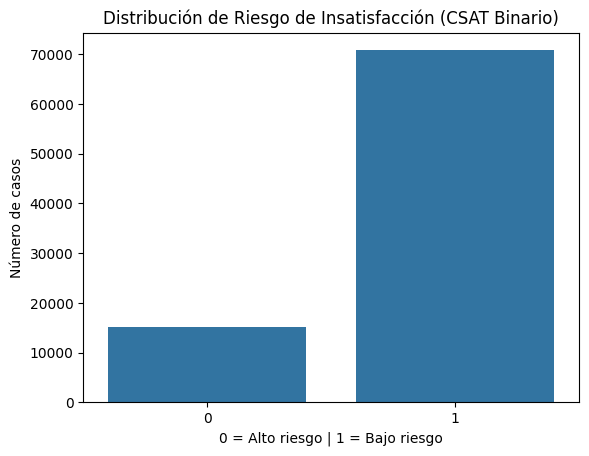

In [ ]:
sns.countplot(
    data=df_pre,
    x='CSAT_binary'
)
plt.title('Distribución de Riesgo de Insatisfacción (CSAT Binario)')
plt.xlabel('0 = Alto riesgo | 1 = Bajo riesgo')
plt.ylabel('Número de casos')
plt.show()

In [ ]:
# ===================================
# 4.2 RIESGO POR CANAL (chanel_name)
# ===================================

risk_by_channel = (
    df_pre
    .groupby('channel_name')['CSAT_binary']
    .mean()
    .sort_values()
)

risk_by_channel

,CSAT_binary
channel_name,
Email,0.734701
Inbound,0.826994
Outcall,0.831773


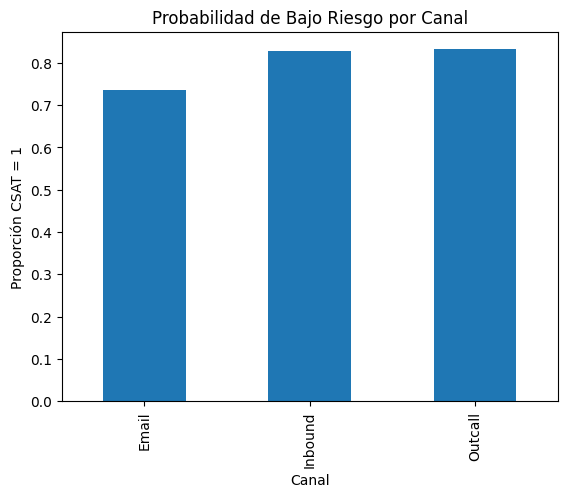

In [ ]:
risk_by_channel.plot(kind='bar')
plt.title('Probabilidad de Bajo Riesgo por Canal')
plt.ylabel('Proporción CSAT = 1')
plt.xlabel('Canal')
plt.show()


In [ ]:
# ==============================
# 4.3 RIESGO POR CATEGORIA
# ==============================

risk_by_category = (
    df_pre
    .groupby('category')['CSAT_binary']
    .mean()
    .sort_values()
)

risk_by_category.head(10)

,CSAT_binary
category,
Others,0.595960
Cancellation,0.759042
Product Queries,0.768960
Order Related,0.785570
Feedback,0.798605
Onboarding related,0.815385
Refund Related,0.823297
Offers & Cashback,0.829167
Shopzilla Related,0.839900


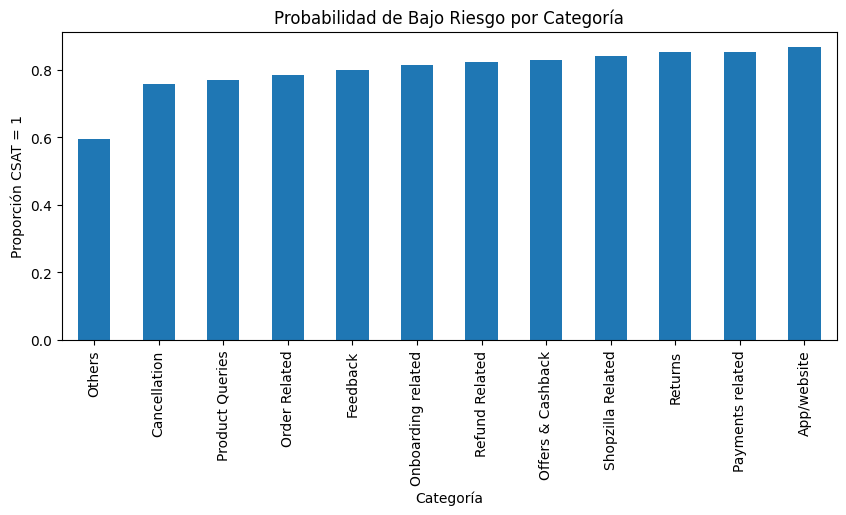

In [ ]:
risk_by_category.plot(kind='bar', figsize=(10,4))
plt.title('Probabilidad de Bajo Riesgo por Categoría')
plt.ylabel('Proporción CSAT = 1')
plt.xlabel('Categoría')
plt.show()

In [ ]:
# ===================================
# 4.4 TURNO DEL AGENTE (Agent Shift)
# ===================================

risk_by_shift = (
    df_pre
    .groupby('Agent Shift')['CSAT_binary']
    .mean()
    .sort_values()
)

risk_by_shift

,CSAT_binary
Agent Shift,
Morning,0.811302
Night,0.828267
Evening,0.833388
Afternoon,0.837671
Split,0.871436


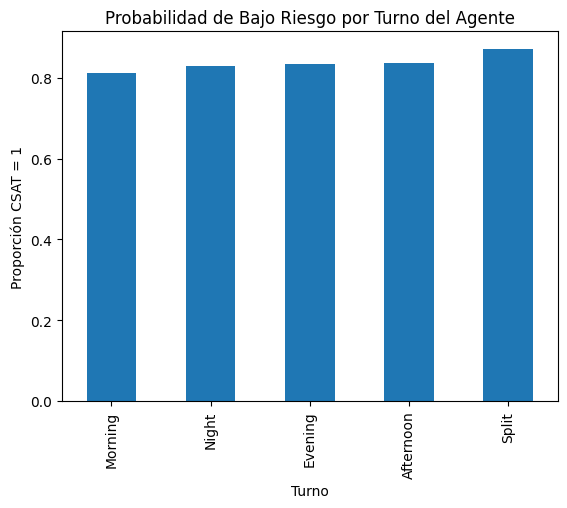

In [ ]:
risk_by_shift.plot(kind='bar')
plt.title('Probabilidad de Bajo Riesgo por Turno del Agente')
plt.ylabel('Proporción CSAT = 1')
plt.xlabel('Turno')
plt.show()

In [ ]:
# ===========================================
# 4.4 EXPERIENCIA DEL AGENTE (Tenure Bucket)
# ===========================================

risk_by_tenure = (
    df_pre
    .groupby('Tenure Bucket')['CSAT_binary']
    .mean()
    .sort_values()
)

risk_by_tenure

,CSAT_binary
Tenure Bucket,
On Job Training,0.800219
0-30,0.828592
>90,0.832779
31-60,0.837462
61-90,0.850319


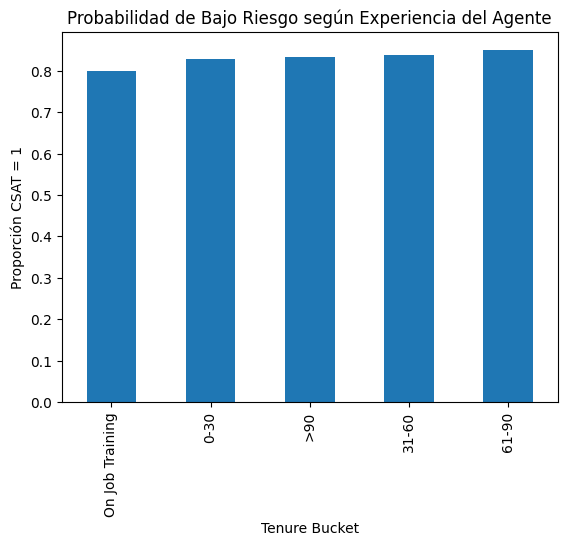

In [ ]:
risk_by_tenure.plot(kind='bar')
plt.title('Probabilidad de Bajo Riesgo según Experiencia del Agente')
plt.ylabel('Proporción CSAT = 1')
plt.xlabel('Tenure Bucket')
plt.show()

### **Conclusión General**

El análisis integral de los datos revela un dataset desbalanceado, donde aproximadamente el 17.54% de los casos corresponden a situaciones de alto riesgo de insatisfacción, lo que equivale a cerca de 15.000 interacciones críticas.

Este comportamiento es consistente con escenarios reales de atención al cliente, donde la mayoría de los contactos son satisfactorios y el verdadero desafío radica en identificar anticipadamente el grupo minoritario con mayor probabilidad de insatisfacción.

### Perfil de Riesgo Consolidado:

Con el objetivo de detectar de manera temprana ese ~18% de casos antes de que la experiencia del cliente se deteriore, el análisis exploratorio permite identificar un perfil de riesgo asociado a la combinación de los siguientes factores:

* **Canal crítico:** El canal Email presenta los mayores niveles de fricción, concentrando una mayor proporción de casos con insatisfacción.

* **Categoría de alerta:** Los casos clasificados como “Others” muestran el comportamiento más riesgoso, con cerca del 40% de calificaciones negativas, lo que sugiere problemas de ambigüedad o complejidad en este tipo de solicitudes.

* **Experiencia del agente:** Los agentes en etapa de On Job Training presentan una mayor probabilidad de no resolver satisfactoriamente los casos, evidenciando el impacto de la experiencia en la percepción del cliente.

* **Factor horario:** Las interacciones atendidas durante el turno de la Mañana (Morning) registran un riesgo ligeramente superior de terminar en una calificación baja, lo que podría estar relacionado con carga operativa o volumen de casos.

### Insight clave de negocio

Estos hallazgos confirman que el riesgo de insatisfacción no es aleatorio, sino que puede inferirse a partir de información disponible antes de la interacción. Esto respalda la viabilidad de un modelo predictivo como sistema de alerta temprana para apoyar la asignación inteligente de casos y mejorar la experiencia del cliente.

## **5. Modelado y evaluación**

In [ ]:
# ===============================
# SEPARACIÓN DE X e Y
# ===============================

X = df_pre.drop(columns=['CSAT Score', 'CSAT_binary'])
y = df_pre['CSAT_binary']

X.head(), y.head()

(  channel_name         category                  Sub-category Agent Shift  \
 0      Outcall  Product Queries                Life Insurance     Morning   
 1      Outcall  Product Queries  Product Specific Information     Morning   
 2      Inbound    Order Related             Installation/demo     Evening   
 3      Inbound          Returns        Reverse Pickup Enquiry     Evening   
 4      Inbound     Cancellation                    Not Needed     Morning   
 
      Tenure Bucket  
 0  On Job Training  
 1              >90  
 2  On Job Training  
 3              >90  
 4             0-30  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: CSAT_binary, dtype: int64)

In [ ]:
X.dtypes

,0
channel_name,object
category,object
Sub-category,object
Agent Shift,object
Tenure Bucket,object


In [ ]:
# ===============================
# TRAIN / TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificación rápida
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


(CSAT_binary
 1    0.824562
 0    0.175438
 Name: proportion, dtype: float64,
 CSAT_binary
 1    0.824584
 0    0.175416
 Name: proportion, dtype: float64)

### **5.1 Experimento A: One-Hot Encoding**

#### **5.1.1 Preprocesamiento de datos**


In [ ]:
!pip install category_encoders
import category_encoders as ce

In [ ]:
# ===============================
# ONE-HOT ENCODING
# ===============================

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import category_encoders as ce

categorical_features = ['channel_name', 'category', 'Agent Shift', 'Tenure Bucket']

frequency_features = ['Sub-category']


cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))  # importante
])

freq_pipeline = Pipeline(steps=[
    ('count', ce.CountEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, categorical_features),
        ('freq', freq_pipeline, frequency_features)

    ])

In [ ]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
X_train_encoded.shape, X_test_encoded.shape


((68725, 26), (17182, 26))

In [ ]:
# ========================================
# BALANCEO DE DATOS CON SMOTE
# ========================================

from imblearn.over_sampling import SMOTE

y_train.value_counts()


,count
CSAT_binary,
1,56668
0,12057


In [ ]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(
    X_train_encoded,
    y_train
)

pd.Series(y_train_balanced).value_counts(normalize=True)


,proportion
CSAT_binary,
0,0.5
1,0.5


In [ ]:
pd.Series(y_train_balanced).value_counts()

,count
CSAT_binary,
0,56668
1,56668


**Nota:** Dado el fuerte desbalance del dataset, se aplicó la técnica SMOTE exclusivamente sobre el conjunto de entrenamiento, con el fin de incrementar la representación de la clase minoritaria (casos de alto riesgo) sin incurrir en data leakage.

#### **5.1.2 Regresión logística — Baseline explicable**

* Interpretabilidad
* Punto de referencia


In [ ]:
# ===============================
# MODELO 1: REGRESIÓN
# ===============================

log_reg_bal = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# Entrenamiento
log_reg_bal.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predicciones sobre el test real

y_pred_log_bal = log_reg_bal.predict(X_test_encoded)
y_proba_log_bal = log_reg_bal.predict_proba(X_test_encoded)[:, 1]

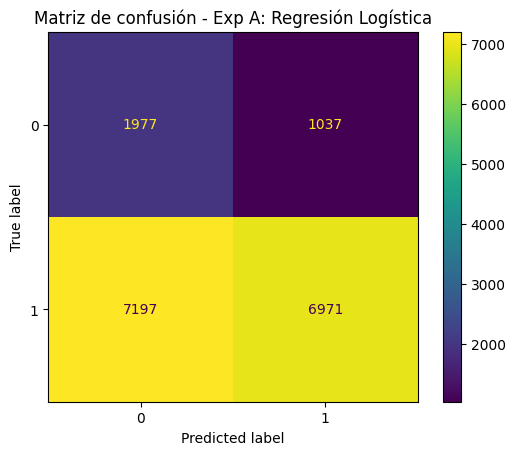

              precision    recall  f1-score   support

           0       0.22      0.66      0.32      3014
           1       0.87      0.49      0.63     14168

    accuracy                           0.52     17182
   macro avg       0.54      0.57      0.48     17182
weighted avg       0.76      0.52      0.58     17182



np.float64(0.597891984966074)

In [ ]:
# Matriz de confusión

cm_log_bal = confusion_matrix(y_test, y_pred_log_bal)
ConfusionMatrixDisplay(cm_log_bal).plot()
plt.title("Matriz de confusión - Exp A: Regresión Logística")
plt.show()

# Reporte de clasificación

print(classification_report(y_test, y_pred_log_bal))

# ROC-AUC

roc_auc_log_bal = roc_auc_score(y_test, y_proba_log_bal)
roc_auc_log_bal


#### **5.1.3 Random Forest**

Captura:

* Relaciones no lineales
* Interacciones entre variables
* Patrones más complejos

In [ ]:
# ===============================
# MODELO 2: RANDOM FOREST
# ===============================

rf_bal = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
rf_bal.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
pd.DataFrame(X_test_encoded.todense())


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.00000,2.46877,0.000000,0.0,6.337465,0.0,0.0,0.0,0.00000,0.0,...,0.000000,2.001328,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,2.189242,-0.850805
1,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,2.25379,0.0,...,0.000000,2.001328,0.00000,0.0,2.95993,0.000000,0.000000,0.00000,0.000000,-0.250526
2,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,2.048412,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,2.08603,0.000000,-0.858607
3,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,2.25379,0.0,...,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,2.08603,0.000000,-0.902567
4,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,2.048412,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,2.189242,1.612427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17177,0.00000,0.00000,2.651687,0.0,0.000000,0.0,0.0,0.0,2.25379,0.0,...,0.000000,2.001328,0.00000,0.0,0.00000,0.000000,0.000000,2.08603,0.000000,-0.250526
17178,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.000000,2.001328,0.00000,0.0,0.00000,0.000000,0.000000,2.08603,0.000000,-0.991686
17179,0.00000,2.46877,0.000000,0.0,0.000000,0.0,0.0,0.0,2.25379,0.0,...,2.048412,0.000000,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,2.189242,-0.587048
17180,5.42867,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,2.25379,0.0,...,0.000000,2.001328,0.00000,0.0,0.00000,0.000000,3.718357,0.00000,0.000000,-0.587048


In [ ]:
# Predicciones sobre el test real

y_pred_rf_bal = rf_bal.predict(X_test_encoded)
y_proba_rf_bal = rf_bal.predict_proba(X_test_encoded)[:, 1]

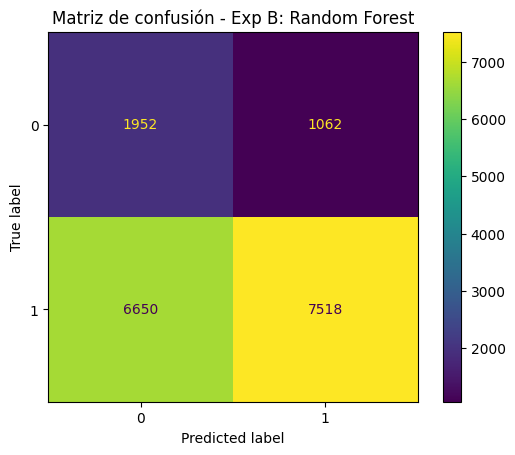

              precision    recall  f1-score   support

           0       0.23      0.65      0.34      3014
           1       0.88      0.53      0.66     14168

    accuracy                           0.55     17182
   macro avg       0.55      0.59      0.50     17182
weighted avg       0.76      0.55      0.60     17182



np.float64(0.6179830094604625)

In [ ]:
# Martiz de confusión

cm_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
ConfusionMatrixDisplay(cm_rf_bal).plot()
plt.title("Matriz de confusión - Exp B: Random Forest")
plt.show()

# Reporte de clasificación

print(classification_report(y_test, y_pred_rf_bal))

# ROC-AUC

roc_auc_rf_bal = roc_auc_score(y_test, y_proba_rf_bal)
roc_auc_rf_bal


#### **5.1.4 XGBoost**

In [ ]:
# ===============================
# MODELO 3: XGBOOST
# ===============================

from xgboost import XGBClassifier


In [ ]:
xgb_bal = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


# Entrenamiento
xgb_bal.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Predicciones sobre el test real
y_pred_xgb_bal = xgb_bal.predict(X_test_encoded)
y_proba_xgb_bal = xgb_bal.predict_proba(X_test_encoded)[:, 1]


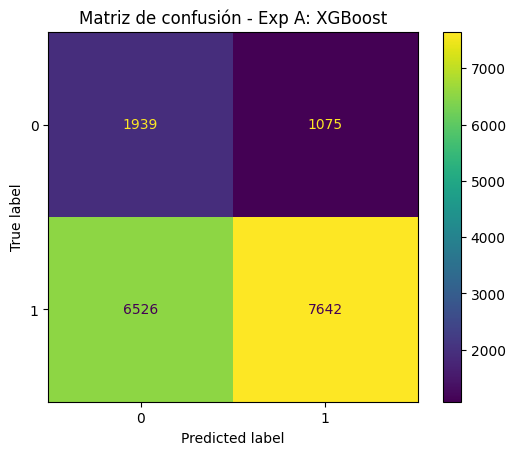

              precision    recall  f1-score   support

           0       0.23      0.64      0.34      3014
           1       0.88      0.54      0.67     14168

    accuracy                           0.56     17182
   macro avg       0.55      0.59      0.50     17182
weighted avg       0.76      0.56      0.61     17182



np.float64(0.6301500910301148)

In [ ]:
# Matriz de confusión
cm_xgb_bal = confusion_matrix(y_test, y_pred_xgb_bal)
ConfusionMatrixDisplay(cm_xgb_bal).plot()
plt.title("Matriz de confusión - Exp A: XGBoost")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred_xgb_bal))

# ROC-AUC
roc_auc_xgb_bal = roc_auc_score(y_test, y_proba_xgb_bal)
roc_auc_xgb_bal


### **5.2 Experimento B: Under-sampling + Target Encoding**

#### **5.2.1 Under-sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
y_train_under.value_counts()


,count
CSAT_binary,
0,12057
1,12057


#### **5.2.2 Target Encoding**

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
categorical_cols = X_train.columns.tolist()

te = TargetEncoder(cols=categorical_cols)

X_train_te = te.fit_transform(X_train_under, y_train_under)
X_test_te = te.transform(X_test)



#### **5.2.3 XGBoost**

In [ ]:
# ===============================
# MODELO 1: XGBOOST
# ===============================

#Entrenamiento
from xgboost import XGBClassifier

xgb_expB = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_expB.fit(X_train_te, y_train_under)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

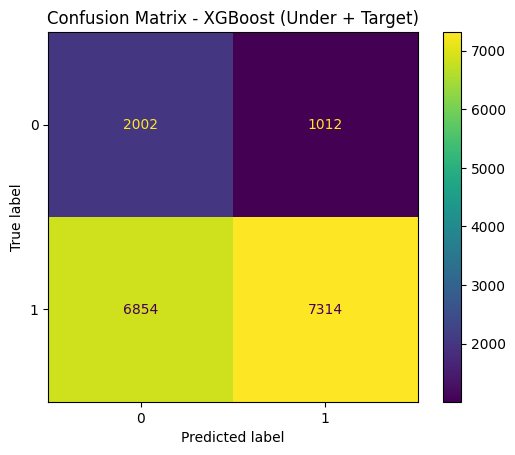

              precision    recall  f1-score   support

           0       0.23      0.66      0.34      3014
           1       0.88      0.52      0.65     14168

    accuracy                           0.54     17182
   macro avg       0.55      0.59      0.49     17182
weighted avg       0.76      0.54      0.60     17182



np.float64(0.632621641074946)

In [ ]:
# Evaluación
y_pred_B = xgb_expB.predict(X_test_te)
y_proba_B = xgb_expB.predict_proba(X_test_te)[:, 1]

# Matriz de confusión
cm_B = confusion_matrix(y_test, y_pred_B)
ConfusionMatrixDisplay(cm_B).plot()
plt.title("Confusion Matrix - XGBoost (Under + Target)")
plt.show()

# Reporte
print(classification_report(y_test, y_pred_B))

# ROC-AUC
roc_auc_B = roc_auc_score(y_test, y_proba_B)
roc_auc_B



#### **5.2.4 Random Forest**

In [ ]:
y_train_under.value_counts()


,count
CSAT_binary,
0,12057
1,12057


##### **Target Encoding**

In [ ]:
# ===============================
# MODELO 2: RANDOM FOREST
# ===============================

from category_encoders import TargetEncoder
categorical_cols = X_train.columns.tolist()

te = TargetEncoder(cols=categorical_cols)

X_train_te = te.fit_transform(X_train_under, y_train_under)
X_test_te = te.transform(X_test)


In [ ]:
# Entrenamiento
from sklearn.ensemble import RandomForestClassifier

rf_expB = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf_expB.fit(X_train_te, y_train_under)


RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=300,
                       n_jobs=-1, random_state=42)

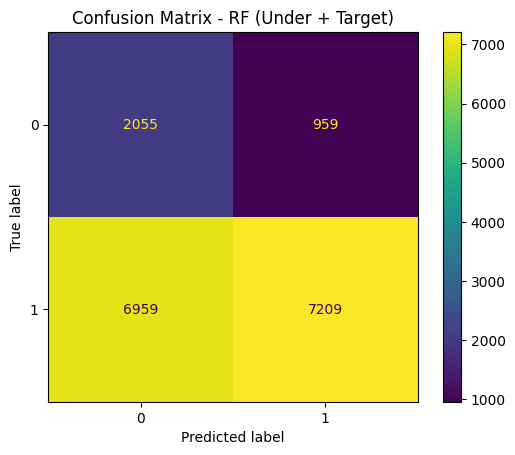

              precision    recall  f1-score   support

           0       0.23      0.68      0.34      3014
           1       0.88      0.51      0.65     14168

    accuracy                           0.54     17182
   macro avg       0.56      0.60      0.49     17182
weighted avg       0.77      0.54      0.59     17182



np.float64(0.6378404168463601)

In [ ]:
# Evaluación
y_pred_rf_B = rf_expB.predict(X_test_te)
y_proba_rf_B = rf_expB.predict_proba(X_test_te)[:, 1]

# Matriz de confusión
cm_rf_B = confusion_matrix(y_test, y_pred_rf_B)
ConfusionMatrixDisplay(cm_rf_B).plot()
plt.title("Confusion Matrix - RF (Under + Target)")
plt.show()

# Reporte
print(classification_report(y_test, y_pred_rf_B))

# ROC-AUC
roc_auc_rf_B = roc_auc_score(y_test, y_proba_rf_B)
roc_auc_rf_B


### **5.3 Experimento C: Over-sampling + Frequency Encoding + XGBoost y Random Forest**

#### **5.3.1 Frecuency Encoding**

In [ ]:
# ===========================
# FREQUENCY ENCODING
# ===========================

X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

for col in X_train.columns:
    freq = X_train[col].value_counts(normalize=True)
    X_train_fe[col] = X_train[col].map(freq)
    X_test_fe[col] = X_test[col].map(freq)

# Reemplazamos valores nuevos (si existen)
X_test_fe.fillna(0, inplace=True)
X_train_fe.head()


,channel_name,category,Sub-category,Agent Shift,Tenure Bucket
72485,0.793132,0.513656,0.261026,0.042721,0.357890
61565,0.793132,0.513656,0.261026,0.391939,0.296646
42728,0.793132,0.513656,0.030193,0.481790,0.296646
79538,0.793132,0.269494,0.085937,0.481790,0.131408
76027,0.793132,0.513656,0.261026,0.481790,0.357890


#### **5.3.2 XGBoost**

In [ ]:
# ===============================
# MODELO 1: XGBOOST
# ===============================

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_fe, y_train)

# Verificamos balance
y_train_bal.value_counts(normalize=True)


,proportion
CSAT_binary,
0,0.5
1,0.5


In [ ]:
# Entrenamiento

from xgboost import XGBClassifier

xgb_expA = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_expA.fit(X_train_bal, y_train_bal)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

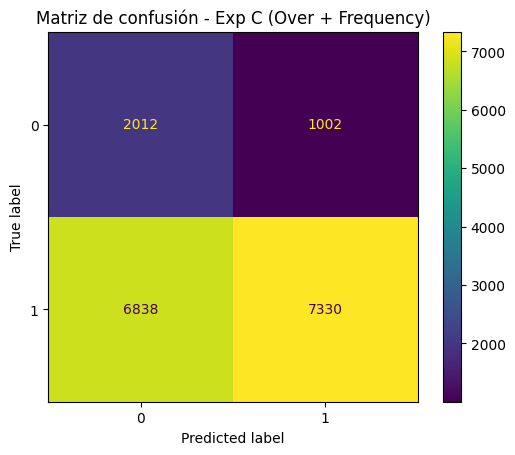

              precision    recall  f1-score   support

           0       0.23      0.67      0.34      3014
           1       0.88      0.52      0.65     14168

    accuracy                           0.54     17182
   macro avg       0.55      0.59      0.50     17182
weighted avg       0.77      0.54      0.60     17182



np.float64(0.6294466168982916)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

y_pred_A = xgb_expA.predict(X_test_fe)
y_proba_A = xgb_expA.predict_proba(X_test_fe)[:, 1]

# Matriz de confusión
cm_A = confusion_matrix(y_test, y_pred_A)
ConfusionMatrixDisplay(cm_A).plot()
plt.title("Matriz de confusión - Exp C (Over + Frequency)")
plt.show()

# Reporte
print(classification_report(y_test, y_pred_A))

# ROC-AUC
roc_auc_A = roc_auc_score(y_test, y_proba_A)
roc_auc_A



#### **5.3.3 Random Forest**

In [ ]:
# ===============================
# MODELO 2: RANDOM FOREST
# ===============================

# Entrenamiento

from sklearn.ensemble import RandomForestClassifier

rf_expA = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf_expA.fit(X_train_bal, y_train_bal)


RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=300,
                       n_jobs=-1, random_state=42)

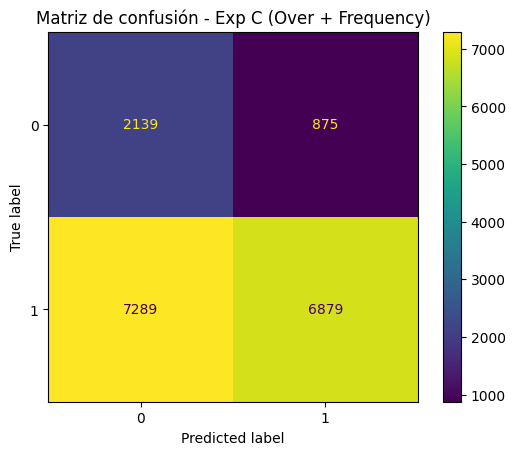

              precision    recall  f1-score   support

           0       0.23      0.71      0.34      3014
           1       0.89      0.49      0.63     14168

    accuracy                           0.52     17182
   macro avg       0.56      0.60      0.49     17182
weighted avg       0.77      0.52      0.58     17182



np.float64(0.6354688144578079)

In [ ]:
#Evaluación
y_pred_rf_A = rf_expA.predict(X_test_fe)
y_proba_rf_A = rf_expA.predict_proba(X_test_fe)[:, 1]

# Matriz de confusión
cm_rf_A = confusion_matrix(y_test, y_pred_rf_A)
ConfusionMatrixDisplay(cm_rf_A).plot()
plt.title("Matriz de confusión - Exp C (Over + Frequency)")
plt.show()

# Reporte
print(classification_report(y_test, y_pred_rf_A))

# ROC-AUC
roc_auc_rf_A = roc_auc_score(y_test, y_proba_rf_A)
roc_auc_rf_A


**Modelo final seleccionado: Over-sampling + Frequency Encoding + Random Forest**

El modelo Over-sampling (SMOTE) + Frequency Encoding + Random Forest fue seleccionado como modelo final al ofrecer el mejor equilibrio entre desempeño y estabilidad.

El over-sampling permitió abordar el desbalance de clases, mejorando el recall, mientras que el frequency encoding evitó riesgos de data leakage.

Random Forest demostró un comportamiento robusto y consistente, capturando relaciones no lineales sin perder capacidad de generalización.

##### **5.3.3.1 Ajuste del umbral**

In [ ]:
# Búsqueda del mejor umbral
import numpy as np
from sklearn.metrics import classification_report

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred_t = (y_proba_rf_A >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)

    results.append({
        'threshold': t,
        'recall_0': report['0']['recall'],
        'precision_0': report['0']['precision'],
        'f1_0': report['0']['f1-score'],
        'accuracy': report['accuracy']
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df.sort_values(by='f1_0', ascending=False).head(10)


,threshold,recall_0,precision_0,f1_0,accuracy
8,0.50,0.709688,0.226877,0.343835,0.524852
9,0.55,0.824818,0.213758,0.339525,0.437085
10,0.60,0.882216,0.205694,0.333605,0.381737
11,0.65,0.909423,0.202452,0.331179,0.355663
7,0.45,0.427339,0.256676,0.320717,0.682458
12,0.70,0.950896,0.190711,0.317703,0.283553
13,0.75,0.982747,0.181829,0.306879,0.221278
14,0.80,0.992369,0.178237,0.302198,0.196077
15,0.85,0.998009,0.176226,0.299557,0.181294
6,0.40,0.195421,0.292889,0.234428,0.776103


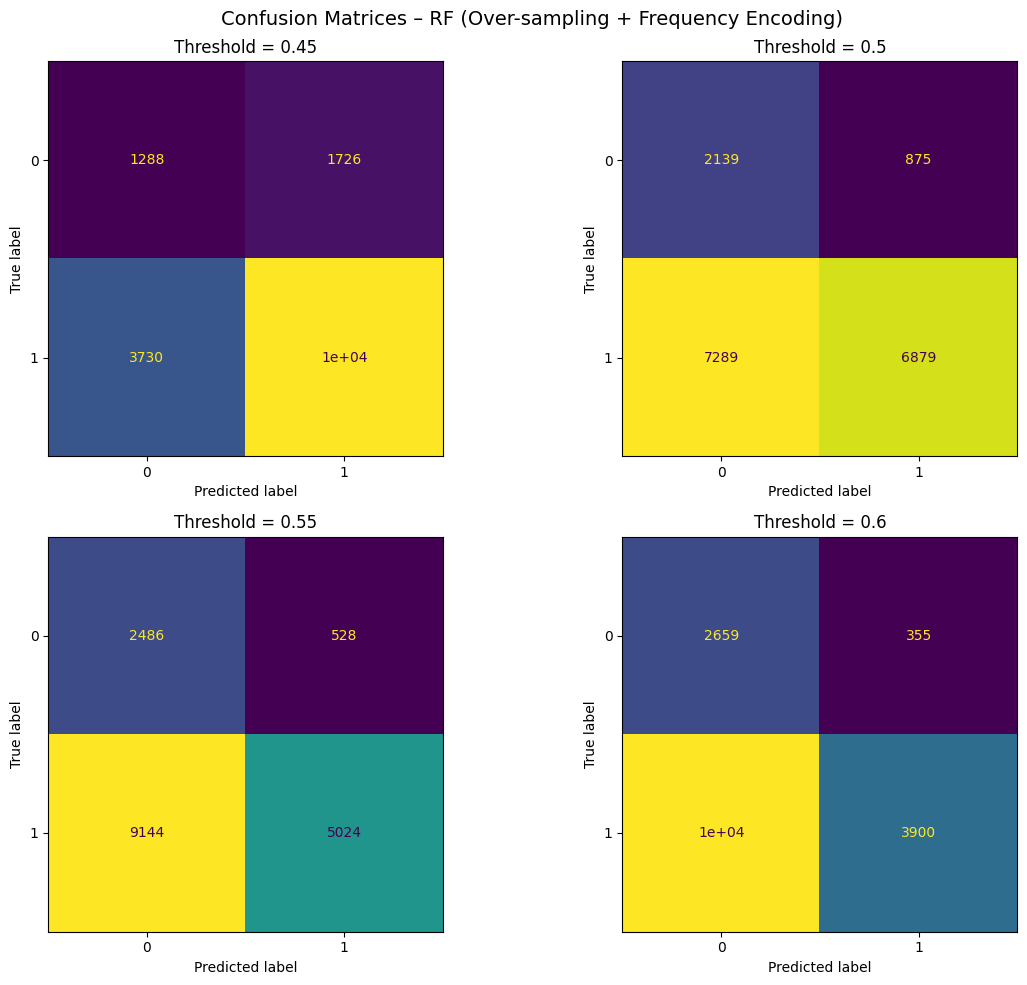

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

thresholds = [0.45, 0.50, 0.55, 0.60]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, t in enumerate(thresholds):
    y_pred_t = (y_proba_rf_A >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_t)

    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"Threshold = {t}")

plt.suptitle("Confusion Matrices – RF (Over-sampling + Frequency Encoding)", fontsize=14)
plt.tight_layout()
plt.show()


Se seleccionó un umbral de decisión de 0.55 ya que ofrece un mejor equilibrio entre el recall de la clase minoritaria (clase 0) y el desempeño global del modelo, reduciendo falsos negativos sin una caída abrupta en el accuracy.

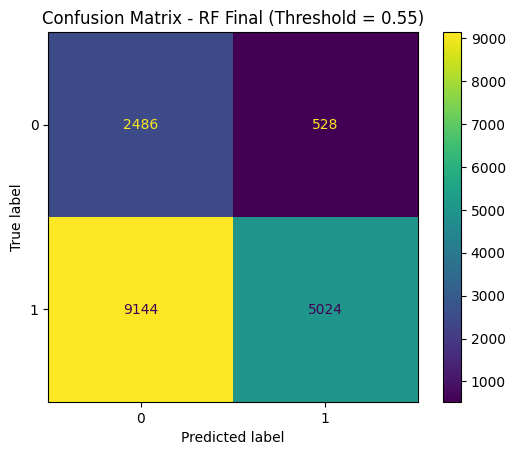

              precision    recall  f1-score   support

           0       0.21      0.82      0.34      3014
           1       0.90      0.35      0.51     14168

    accuracy                           0.44     17182
   macro avg       0.56      0.59      0.42     17182
weighted avg       0.78      0.44      0.48     17182



np.float64(0.6354688144578079)

In [ ]:
# Umbral final seleccionado
final_threshold = 0.55

y_pred_final = (y_proba_rf_A >= final_threshold).astype(int)

# Matriz de confusión final
cm_final = confusion_matrix(y_test, y_pred_final)
ConfusionMatrixDisplay(cm_final).plot()
plt.title("Confusion Matrix - RF Final (Threshold = 0.55)")
plt.show()

# Reporte final
print(classification_report(y_test, y_pred_final))

# ROC-AUC (no depende del umbral)
roc_auc_final = roc_auc_score(y_test, y_proba_rf_A)
roc_auc_final


El modelo final seleccionado corresponde a un Random Forest entrenado con over-sampling y Frequency Encoding, ajustando el umbral de decisión a 0.55 para priorizar la detección de la clase minoritaria sin sacrificar significativamente el desempeño global.

### **5.4 Ajuste de hiperparámetros – Random Forest (GridSearch)**

⚠️ Nota:
El ajuste de hiperparámetros mediante GridSearch es computacionalmente costoso.
Por esta razón, el modelo final se entrena una única vez y se guarda para su reutilización en ejecuciones posteriores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
# Definición del modelo base
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


In [ ]:
# Definición de Grid de hiperparámetros
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [10, 20, 30],
    'min_samples_split': [10, 20]
}


In [ ]:
# Configuración del GridSearch
grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)


In [94]:
# Entrenamiento
grid_rf.fit(X_train_bal, y_train_bal)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 300]},
             scoring='recall', verbose=1)

In [95]:
# Revisión del modelo
grid_rf.best_params_


{'max_depth': 12,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 300}

In [100]:
best_rf = grid_rf.best_estimator_


In [113]:
# Se guarda para su reutilización en ejecuciones posteriores.

import joblib

RUN_GRID = False  # Cambiar a True solo si se desea reentrenar

if RUN_GRID:
    grid_rf.fit(X_train_bal, y_train_bal)
    rf_best = grid_rf.best_estimator_
    joblib.dump(rf_best, "rf_final.pkl")
else:
    rf_best = joblib.load("rf_final.pkl")


In [101]:
# Evaluación del test (con encoding FE)
y_proba_rf_opt = best_rf.predict_proba(X_test_fe)[:, 1]

# Se aplica el umbral elegido (0.55)
final_threshold = 0.55
y_pred_rf_opt = (y_proba_rf_opt >= final_threshold).astype(int)


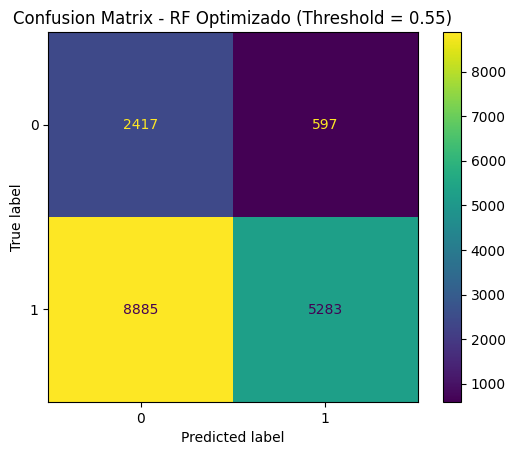

              precision    recall  f1-score   support

           0       0.21      0.80      0.34      3014
           1       0.90      0.37      0.53     14168

    accuracy                           0.45     17182
   macro avg       0.56      0.59      0.43     17182
weighted avg       0.78      0.45      0.49     17182



np.float64(0.6325937035037321)

In [102]:
# Métricas finales del modelo optimizado

# Matriz de confusión
cm_opt = confusion_matrix(y_test, y_pred_rf_opt)
ConfusionMatrixDisplay(cm_opt).plot()
plt.title("Confusion Matrix - RF Optimizado (Threshold = 0.55)")
plt.show()

# Reporte
print(classification_report(y_test, y_pred_rf_opt))

# ROC-AUC
roc_auc_rf_opt = roc_auc_score(y_test, y_proba_rf_opt)
roc_auc_rf_opt


In [126]:
import joblib

# Guardar modelo en Colab
joblib.dump(rf_best, "rf_final.pkl")


['rf_final.pkl']

In [127]:
from google.colab import files

# Descargar el modelo
files.download("rf_final.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [128]:
# Guardar X_train en CSV
X_train.to_csv("X_train.csv", index=False)

# Descargarlo a tu PC
files.download("X_train.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tras el ajuste de hiperparámetros mediante GridSearch, el modelo Random Forest optimizado mostró una mejora significativa en el recall de la clase minoritaria (riesgo), alcanzando un 80%.

Aunque el accuracy global disminuyó, este comportamiento es consistente con el objetivo del proyecto: priorizar la detección temprana de clientes insatisfechos, incluso a costa de generar falsos positivos.
El modelo final ofrece un equilibrio adecuado entre capacidad predictiva, interpretabilidad y utilidad para la toma de decisiones preventivas.

## **6. Conclusiones y propuesta estratégica**

### **6.1 Conclusiones técnicas y metodológicas**

El proyecto permitió construir y evaluar un modelo de clasificación orientado a la detección temprana del riesgo de insatisfacción del cliente (CSAT bajo) utilizando únicamente información disponible antes de la interacción. Para abordar el desbalance del dataset se aplicaron técnicas de over-sampling y se compararon distintas estrategias de codificación de variables categóricas, priorizando un tratamiento consistente y reproducible de los datos.

El mejor desempeño se obtuvo mediante un modelo Random Forest, optimizado a través de GridSearch, ajustando la profundidad del árbol, el tamaño del bosque y los criterios de partición. La evaluación del modelo priorizó métricas de sensibilidad (recall) sobre la clase de alto riesgo, con especial énfasis en mantener un equilibrio entre clases mediante el uso de Macro Recall, dada la relevancia operativa de identificar correctamente los casos críticos.

Adicionalmente, el ajuste del umbral de decisión a 0.55 permitió alinear el modelo con un enfoque preventivo, maximizando la detección de posibles escenarios de insatisfacción. Esta decisión reconoce la asimetría de costos en el contexto del servicio al cliente, donde el impacto de no anticipar un caso problemático resulta más costoso que la generación de falsas alertas controladas.

### **6.2 Implicaciones para el negocio y eficiencia operativa**


Desde una perspectiva de negocio, los resultados evidencian que una proporción significativa de la insatisfacción puede ser anticipada a partir de variables como el canal de contacto, la categoría del caso y la experiencia del agente. Esta capacidad predictiva habilita una segmentación temprana de llamadas, permitiendo una asignación más eficiente de los recursos disponibles.

La identificación previa de interacciones de alto riesgo reduce la probabilidad de que casos complejos sean atendidos por agentes con menor experiencia, impactando positivamente indicadores clave como CSAT, First Contact Resolution (FCR) y AHT. Asimismo, el modelo contribuye a la protección del talento humano, disminuyendo el desgaste del personal senior al filtrar y priorizar únicamente aquellos casos que realmente requieren su intervención.

### **6.3 Propuesta estratégica: IVR inteligente basado en riesgo**


Como extensión evolutiva del modelo, se propone la integración de un IVR inteligente basado en riesgo. Ante la detección de una llamada con alta probabilidad de insatisfacción, el sistema podría interactuar dinámicamente con el cliente mediante preguntas orientadas a identificar recurrencia o problemas no resueltos, tales como:

“¿Ha llamado anteriormente por este mismo inconveniente?”

La información capturada permitiría:
* Identificar proactivamente clientes reincidentes con mayor probabilidad de insatisfacción.
* Enriquecer el modelo predictivo con datos en tiempo real, aumentando su precisión.
* Incrementar la resolución efectiva en el primer contacto, fortaleciendo la percepción de marca.

De esta forma, el IVR deja de ser un simple mecanismo de ruteo y se convierte en un componente activo de la estrategia de experiencia del cliente.

### **6.4 Limitaciones y trabajo futuro**


Si bien el modelo presenta un desempeño sólido en términos de recall, se identifica una oportunidad de mejora en la precisión de la clase de bajo riesgo, con el fin de reducir el volumen de falsos positivos. Como líneas de trabajo futuro se recomienda:

* Análisis de sentimiento, incorporando texto de chats o transcripciones de llamadas.
* Modelos de ensamble avanzados, como XGBoost o LightGBM, para capturar relaciones no lineales más complejas.
* Monitoreo de deriva del modelo (data y concept drift), mediante esquemas de reentrenamiento periódico que permitan adaptarse a cambios en el comportamiento de los clientes.